In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql       import functions as D
import pandas as pds
import seaborn as sns

spark1 = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "2g").\
        getOrCreate() 
path1 = 'hdfs://namenode:9000/bases/carbu.csv'
path2 = 'hdfs://namenode:9000/bases/loyer.csv'
path4 = 'hdfs://namenode:9000/bases/ecoles.csv'


df1 = spark1.read.format('csv').options(header=True).load(path1)
df2 = spark1.read.format('csv').options(header=True).load(path2)
df4 = spark1.read.format('csv').options(header=True).load(path4)

print('Nombre Ecole par commune')
dfEc = df4.groupBy('libelle_commune').agg(D.count(df4.numero_uai).alias('NbreEcole'))
dfEc.show()

print('Prix moyen du caburant par ville et par type de carburant')
dfCarMoy = df1.groupBy('prix_nom', 'ville').agg(D.avg(df1.prix_valeur))
dfCarMoy.show()


print('Prix max du caburant par région et par type de carburant')
dfCarMax = df1.groupBy('prix_nom', 'reg_name').agg(D.avg(df1.prix_valeur))
dfCarMax.show()


print('Date ouverture plus Anciennes Ecoles par Région ')
AncEc = (df4.groupBy('libelle_region').agg({'date_ouverture':'min'}))
AncEc.show()


print('Prix du loyer au m2 ')
temp = df2.withColumn("prix_m2",(df2.moyenne_loyer_mensuel/df2.surface_moyenne))
prix_m2 = temp.groupBy("agglomeration").agg(D.avg(temp.prix_m2).alias('locm2'))
prix_m2.show()


print('Jointure entre loyer et école')
LocEco = df2.join(df4, df2.agglomeration == df4.libelle_commune , 'inner')
LocEco.show()


print('Jointure entre prix loyer m2 et nombre école')
LocM2Eco = dfEc.join(prix_m2,dfEc.libelle_commune == prix_m2.agglomeration,'inner')
LocM2Eco.show()

print('Jointure entre prix loyer m2 et prix du carburant')
LocM2Car = dfCarMoy.join(prix_m2,dfCarMoy.ville == prix_m2.agglomeration,'inner')
LocM2Car.show()

   
print('Jointure entre caburant et loyer')
LocCar = df2.join(df1, df2.agglomeration == df1.ville , 'inner')
LocCar.show()


print('chargé et affiché le dataframe Prix du loyer au m2 sur Pandas')
locPN = prix_m2.toPandas()
print(locPN)

print('chargé et affiché le dataframe Prix du loyer au m2 et prix moyen du carburant sur Pandas')
LocCarB = LocM2Car.toPandas()
print(LocCarB)


print('chargé et affiché le dataframe Prix du loyer au m2 et nombre ecole sur Pandas')
LocEcol = LocM2Eco.toPandas()
print(LocEcol)

sns.set_theme()


22/11/19 14:15:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Nombre Ecole par commune


+--------------------+---------+
|     libelle_commune|NbreEcole|
+--------------------+---------+
|          Bar-le-Duc|       18|
|      Vals-les-Bains|        4|
|            Houlgate|        1|
|      Gond-Pontouvre|        6|
|              Payzac|        2|
|            Lavernay|        1|
|             Gaillon|        8|
|              Capian|        1|
|Saint-Médard-en-J...|       19|
|       Saint-Estèphe|        3|
|        Mignovillard|        1|
|                 Mer|        6|
|    Sanssac-l'Eglise|        1|
|              Vayrac|        3|
|               Duras|        2|
|              Barjac|        3|
|           Maxéville|        7|
|              Cappel|        2|
|   Auchy-la-Montagne|        1|
|      Chiry-Ourscamp|        1|
+--------------------+---------+
only showing top 20 rows

Prix moyen du caburant par ville et par type de carburant


+--------+--------------------+------------------+
|prix_nom|               ville|  avg(prix_valeur)|
+--------+--------------------+------------------+
|    SP98|             APPRIEU|             1.639|
|    SP98|              AMBERT|1.6760000000000002|
|  Gazole|         LEUBRINGHEN|             1.758|
|    SP95|Chateauneuf-sur-C...|             1.699|
|     E10|              CEYRAT|             1.565|
|     E10|            LE HAVRE|1.4849999999999999|
|    SP98| NEUVY-SUR-BARANGEON|              1.97|
|     E10|             DOURDAN|             1.619|
|    SP98|SAINT-AMAND-LES-EAUX|             1.712|
|     E85|          Carpentras|0.8256666666666667|
|     E85|Villeneuve-Saint-...|             0.789|
|     E85|                AGDE|             0.739|
|     E10| Colayrac-Saint-Cirq|             1.697|
|    GPLc|            PLOERMEL|             0.814|
|     E10|      Moliets-et-Maa|             1.709|
|     E10|            Surgères|             1.613|
|     E85|           Montbeton|

+--------+--------------------+------------------+
|prix_nom|            reg_name|  avg(prix_valeur)|
+--------+--------------------+------------------+
|     E10|     Hauts-de-France|1.6312228360957637|
|    null|    Pays de la Loire|              null|
|     E85|  Nouvelle-Aquitaine|0.8160032258064519|
|     E10|Auvergne-Rhône-Alpes|1.6168676056338016|
|    GPLc|           Grand Est| 0.789674796747967|
|    SP98|           Normandie|1.7502562500000003|
|    SP98|            Bretagne|1.7341771300448459|
|     E85|Provence-Alpes-Cô...|0.7938698884758365|
|  Gazole|Provence-Alpes-Cô...|1.8847744458930904|
|     E85|     Hauts-de-France|0.8012479338842983|
|     E85|           Occitanie|0.7992165775401066|
|    GPLc|           Normandie|0.7460285714285716|
|     E85|            Bretagne|0.8155542857142861|
|     E10|Provence-Alpes-Cô...|1.5901642743221682|
|  Gazole|           Normandie|1.9108457249070612|
|    null|Bourgogne-Franche...|              null|
|    null| Centre-Val de Loire|

+--------------------+-------------------+
|      libelle_region|min(date_ouverture)|
+--------------------+-------------------+
|    Pays de la Loire|           1/1/1961|
|Bourgogne-Franche...|           1/1/1979|
| Centre-Val de Loire|           1/1/1975|
|Auvergne-Rhône-Alpes|           1/1/1941|
|           Grand Est|           1/1/1955|
|              Guyane|           1/1/1983|
|          Martinique|           1/1/1959|
|TOM et Collectivi...|           1/1/1982|
|     Hauts-de-France|           1/1/1901|
|               Corse|           1/1/1983|
|  Nouvelle-Aquitaine|           1/1/1968|
|          Guadeloupe|           1/1/2009|
|           Occitanie|           1/1/1969|
|             Mayotte|           1/1/1999|
|            Bretagne|           1/1/1980|
|           Normandie|           1/1/1967|
|       Ile-de-France|           1/1/1966|
|          La Réunion|           1/1/1990|
|Provence-Alpes-Cô...|           1/1/1904|
+--------------------+-------------------+

Prix du lo

+----------------+---------+----------------+------------------+
| libelle_commune|NbreEcole|   agglomeration|             locm2|
+----------------+---------+----------------+------------------+
|La Roche-sur-Yon|       65|La Roche-sur-Yon| 7.931202262569315|
|            Nice|      255|            Nice|13.708420636404384|
|     Montpellier|      205|     Montpellier|11.582946078189531|
|          Toulon|      129|          Toulon|11.159646346671856|
|        Grenoble|      105|        Grenoble|10.563314296753283|
|           Lille|      163|           Lille|10.896751570225993|
|Clermont-Ferrand|      110|Clermont-Ferrand|  8.60140410157928|
|          Nantes|      230|          Nantes|10.518386291726392|
|      Draguignan|       39|      Draguignan| 9.826129102555557|
|        Bordeaux|      200|        Bordeaux| 10.86051833633768|
|        Besançon|      109|        Besançon| 9.149449156780165|
|        Toulouse|      339|        Toulouse|10.543272775486393|
|          Rennes|      1

+--------+----------------+------------------+----------------+------------------+
|prix_nom|           ville|  avg(prix_valeur)|   agglomeration|             locm2|
+--------+----------------+------------------+----------------+------------------+
|     E10|            Nice| 1.690888888888889|            Nice|13.708420636404384|
|  Gazole|     Montpellier|1.8699999999999999|     Montpellier|11.582946078189531|
|  Gazole|           Brest|1.9093333333333333|           Brest| 8.314868453099818|
|  Gazole|            Sète|             1.799|            Sète| 9.731008785190086|
|     E10|            Lyon|             1.726|            Lyon|11.390500853450707|
|  Gazole|           Paris| 2.036058823529412|           Paris|  20.7089925991274|
|     E85|            Sète|             0.759|            Sète| 9.731008785190086|
|    SP95|            Lyon|             1.989|            Lyon|11.390500853450707|
|    SP95|       Marseille|1.6793333333333333|       Marseille|11.933605169520643|
|   

                     agglomeration      locm2
0                 Pays de Challans   8.290620
1            Agglomération d'Arles   8.914890
2   Sud Loire - proche Haute-Loire   7.075523
3           Teste-de-Buch-Arcachon  10.388780
4                 La Roche-sur-Yon   7.931202
5                             Nice  13.708421
6                      Montpellier  11.582946
7                           Toulon  11.159646
8                         Grenoble  10.563314
9                            Lille  10.896752
10                Clermont-Ferrand   8.601404
11                          Nantes  10.518386
12                       Marseille  11.933605
13                      Draguignan   9.826129
14                           Paris  20.708993
15     Eurométropole de Strasbourg   9.955287
16                            Lyon  11.390501
17      Unité urbaine de l'Bayonne  10.934787
18   Agglomération d'Aix-Marseille  11.933605
19         Agglomération d'Alençon   7.650108
20                        Bordeaux

    prix_nom        ville  avg(prix_valeur) agglomeration      locm2
0        E10         Nice          1.690889          Nice  13.708421
1     Gazole  Montpellier          1.870000   Montpellier  11.582946
2     Gazole        Brest          1.909333         Brest   8.314868
3     Gazole         Sète          1.799000          Sète   9.731009
4        E10         Lyon          1.726000          Lyon  11.390501
..       ...          ...               ...           ...        ...
109      E10     Besançon          1.546250      Besançon   9.149449
110      E10    Marseille          1.627840     Marseille  11.933605
111      E10  La Rochelle          1.541000   La Rochelle  11.500213
112   Gazole  Montbéliard          1.904500   Montbéliard   7.321496
113     SP95       Rennes          1.788000        Rennes  10.327123

[114 rows x 5 columns]
chargé et affiché le dataframe Prix du loyer au m2 et nombre ecole sur Pandas


     libelle_commune  NbreEcole     agglomeration      locm2
0   La Roche-sur-Yon         65  La Roche-sur-Yon   7.931202
1               Nice        255              Nice  13.708421
2        Montpellier        205       Montpellier  11.582946
3             Toulon        129            Toulon  11.159646
4           Grenoble        105          Grenoble  10.563314
5              Lille        163             Lille  10.896752
6   Clermont-Ferrand        110  Clermont-Ferrand   8.601404
7             Nantes        230            Nantes  10.518386
8         Draguignan         39        Draguignan   9.826129
9           Bordeaux        200          Bordeaux  10.860518
10          Besançon        109          Besançon   9.149449
11          Toulouse        339          Toulouse  10.543273
12            Rennes        151            Rennes  10.327123
13             Nancy         85             Nancy   9.138252
14       Montbéliard         30       Montbéliard   7.321496
15            Fréjus    

Visualisation du prix du loyer au M2 Par ville


<AxesSubplot: xlabel='agglomeration', ylabel='locm2'>

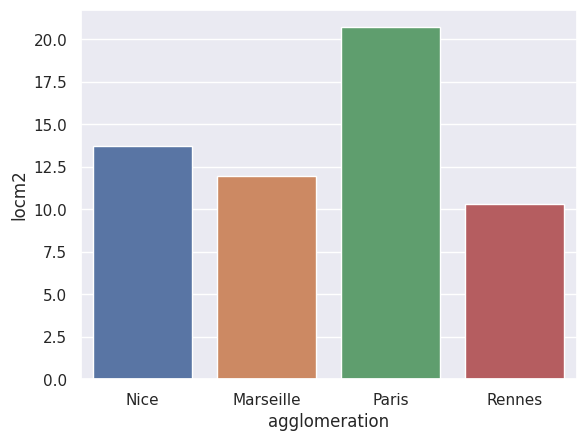

In [18]:
print('Visualisation du prix du loyer au M2 Par ville')
sns.barplot(
   data=locPN[(locPN.agglomeration=="Paris") | (locPN.agglomeration=="Nice") | (locPN.agglomeration=="Marseille") | (locPN.agglomeration=="Rennes")],
    y="locm2",
    x="agglomeration",
)

Visualisation du Prix du loyer au M2 en fonction du prix moyen du carburant


<AxesSubplot: xlabel='agglomeration'>

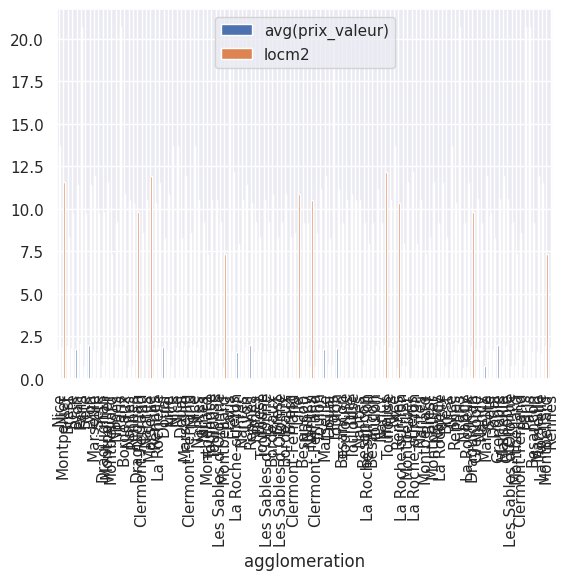

In [31]:
print('Visualisation du Prix du loyer au M2 en fonction du prix moyen du carburant')
LocCarB.plot.bar(x='agglomeration')

<AxesSubplot: xlabel='agglomeration'>

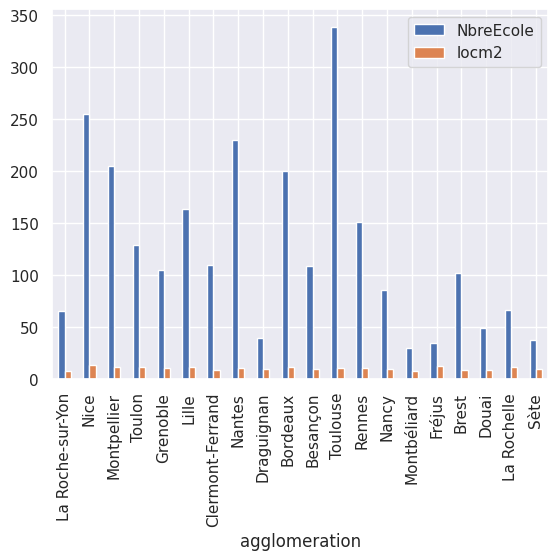

In [23]:
LocEcol.plot.bar(x='agglomeration')